# Limpieza de datos
 
La limpieza de datos es uno de los pasos más importantes en un proyecto de aprendizaje automático, pues, pues el modelo usará las propiedades de cada variable, y si se entrena con datos "sucios" probablemente la salida también esté "sucia".
 
Para evaluar la validez de los datos de nuestro dataset, es importante analizar y corroborar si los datos cumplen o se ajustan a la reglas o restricciones propias del dato:
* **De tipo de dato**: los valores en una columna en particular deben ser de un tipo de datos.
* **De rango**: generalmente, los números o fechas deben estar dentro de un cierto rango.
* **Obligatorias**: determinadas columnas no pueden estar vacías.
* **Únicas**: un campo, debe ser único en un conjunto de datos.
* **De pertenencia al conjunto**: los valores de una columna provienen de un conjunto de valores discretos. Por ejemplo, el sexo biológico de una persona en general se marca como masculino o femenino.
* **Patrones de expresión regular**: campos de texto que deben seguir un patrón determinado. (Email)
* **Validación de campo cruzado**: deben cumplirse determinadas condiciones que abarcan varios campos. Por ejemplo, la fecha de alta de un paciente del hospital no puede ser anterior a la fecha de admisión.
 

El encuentro pasado hicimos una revisión de las columnas y descubrimos que había datos nulos (registros vacíos). No es posible realizar un modelo de aprendizaje automático con datos nulos por lo que veremos diferentes maneras de resolver esta cuestión.

Hay tres posiblidades frente a datos nulos: **imputar**, **marcar** o **eliminar**. En esta Notebook veremos algunos métodos para realizarlo.

In [2]:
#importamos las librerias que utilizaremos

import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

#### Desde el Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [4]:
#Recordar utilizar dataset modificado de la clase pasada. 

data = pd.read_csv("/content/data_clima_clase1.csv")
data.head()

,Unnamed: 0,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia,descripcion,temperatura
0,0,0.92,11.27,130.0,8.05,1021.60,no,Cold,-0.56
1,1,0.73,20.93,330.0,16.10,1017.00,si,Warm,21.11
2,2,0.97,5.97,193.0,14.91,1013.99,si,Normal,16.60
3,3,0.82,3.22,300.0,16.10,1031.59,si,Cold,1.60
4,4,0.60,10.88,116.0,9.98,1020.88,si,Cold,2.19


In [5]:
data.drop(columns="Unnamed: 0", inplace=True)

#### Desde el archivo descargado en la computadora

In [ ]:
from google.colab import files
import io

filesUploaded = files.upload()

In [ ]:
data = pd.read_csv(".csv")

In [ ]:
#vemos los primeros registros del dataset

data.head(3)

In [ ]:
# Vemos el tamaño del dataset

data.shape

#### Identificación de datos nulos

Para observar si hay datos nulos se puede utilizar el método *isnull()* o *isna()* el cual devovlerá **True** en el caso que haya un dato nulo y **False** en el caso que no lo haya.
Esto puede ser utilizado como una máscara para filtrar el dataset y ver los registros nulos.

Para saber la cantidad de datos nulos es posible utilizar *sum()* luego de la identificación de los nulos sabiendo que **True** cuenta como 1 y **False** cuenta como 0, de esta manera sumara 1 por cada dato nulo. 

In [7]:
data.isna().sum()

humedad                 5
velocidad_viento_kmh    5
rumbo_viento_grados     5
visibilidad_km          5
presion_mbar            9
lluvia                  1
descripcion             8
temperatura             0
dtype: int64

In [12]:
#data.isna().sum()
mascara_humedad_isna = data["presion_mbar"].isna()
mascara_humedad_isna
data[mascara_humedad_isna]

,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia,descripcion,temperatura
568,NaN,NaN,NaN,NaN,NaN,si,Normal,16.07
1253,0.42,9.77,138.0,10.35,NaN,si,Normal,13.98
2548,NaN,NaN,NaN,NaN,NaN,si,Warm,27.76
3545,NaN,NaN,NaN,NaN,NaN,si,Normal,17.74
4135,0.48,25.89,302.0,10.58,NaN,si,Normal,17.00
5352,0.92,9.60,154.0,14.59,NaN,si,Cold,3.51
6580,NaN,NaN,NaN,NaN,NaN,si,Warm,22.97
7815,NaN,NaN,NaN,NaN,NaN,si,NaN,0.98
8128,0.35,4.80,50.0,9.98,NaN,si,Warm,27.20


In [19]:
data.dropna(axis=0, thresh=6, inplace=True)

In [21]:
data.isna().sum()

humedad                 0
velocidad_viento_kmh    0
rumbo_viento_grados     0
visibilidad_km          0
presion_mbar            4
lluvia                  1
descripcion             7
temperatura             0
dtype: int64

In [23]:
mascara = data["presion_mbar"].isna()
data.loc[mascara]
data.describe()

,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,temperatura
count,9995.000000,9995.000000,9995.000000,9995.000000,9991.000000,9995.000000
mean,0.735334,10.813809,185.947274,10.372852,1004.884407,11.854565
std,0.195459,6.972945,107.477976,4.179357,109.665639,9.511717
min,0.000000,0.000000,0.000000,0.000000,0.000000,-21.820000
25%,0.600000,5.750000,112.000000,8.285000,1011.890000,4.660000
50%,0.780000,9.930000,179.000000,10.050000,1016.500000,11.560000
75%,0.900000,14.100000,290.000000,14.880000,1021.105000,18.820000
max,1.000000,53.240000,359.000000,16.100000,1045.380000,38.840000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


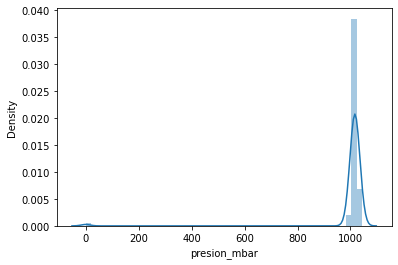

In [27]:
sns.distplot(data['presion_mbar'])

In [36]:
# Empezamos a mirar con mas cuidado los datos y descubrimos que hay valores de presion (y quizas tambien de humedad) que son muy bajos y claramente son erroneos
# Queremos crear un mecanismo que permita distinguir que datos son razonables y cuales no.

# Primer objetivo, descubrir un valor que sirva para distinguir los datos buenos de los malos, si el valor esta por debajo de eso es malo.
# Aclaracion: podriamos ponerlo a mano, por ej: 800 pero queremos que el programa sirva mas en general, por ejemplo si me dan otros datos y puede ser que ahi 800 ya no sirva.

# ¿Como buscamos un valor tipico de presion?
valor_representativo = data['presion_mbar'].mean()
print (f'El valor promedio de las presiones es: {valor_representativo}')
valor_limite = valor_representativo/10
print (f'El valor limite que vamos a usar para considerar una presion como valida, es el 10% del valor premdio de las presion que da: {valor_limite}')

# Queremos que registros (y cuantos) cumplen con tener valores razonables o no razonables.

mascara_valores_validos_presion = data['presion_mbar'] > valor_limite

mascara_valores_validos_presion.sum()

El valor promedio de las presiones es: 1004.8844069662739
El valor limite que vamos a usar para considerar una presion como valida, es el 10% del valor premdio de las presion que da: 100.48844069662739


9874

In [42]:
# Queremos repetir el analisis pero para la columna de humedad

columna_a_analisar = 'presion_mbar'

valor_representativo = data[columna_a_analisar].mean()
print (f'El valor promedio de la columna {columna_a_analisar} es: {valor_representativo}')
valor_limite = valor_representativo/10
print (f'El valor limite que vamos a usar para considerar en la columna {columna_a_analisar} valores validos, es el 10% del valor premdio de la columna {columna_a_analisar} que da: {valor_limite}')

# Queremos que registros (y cuantos) cumplen con tener valores razonables o no razonables.

mascara_valores_validos_de_columna = data[columna_a_analisar] > valor_limite

# Queremos revisar los valores que no cumplen con el criterio:

mascara_valores_invalidos_de_columna = data[columna_a_analisar] < valor_limite

print ("Vamos a visualizar los valores invalidos:")

display (data[mascara_valores_invalidos_de_columna])

# Ojo que esto por mas que funcione con cualquier columna no tiene sentido aplicarlo a cualquier columna.

# Si miramos la columna humedad resulta que los dias de cero humedad, son dias de muy baja tempreatura, lo cual puede tener sentido.

# Vamos a mirar la columna presion

# En la columan presion si parece haber un problema.


El valor promedio de la columna presion_mbar es: 1004.8844069662739
El valor limite que vamos a usar para considerar en la columna presion_mbar valores validos, es el 10% del valor premdio de la columna presion_mbar que da: 100.48844069662739
Vamos a visualizar los valores invalidos:


,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia,descripcion,temperatura
147,0.72,14.10,232.0,0.00,0.0,si,Cold,2.35
223,0.81,11.27,140.0,8.05,0.0,si,Normal,17.22
503,0.66,24.01,20.0,9.98,0.0,si,Normal,11.16
512,0.48,8.65,65.0,11.27,0.0,si,Warm,23.89
523,0.73,11.40,319.0,11.27,0.0,si,Normal,12.30
...,...,...,...,...,...,...,...,...
9768,0.69,21.94,359.0,11.27,0.0,si,Cold,3.94
9844,0.86,15.86,359.0,11.21,0.0,si,Normal,10.05
9877,0.36,14.59,91.0,9.98,0.0,si,Warm,25.00
9931,0.71,5.06,243.0,7.91,0.0,si,Normal,11.19


In [50]:
# Siguiente objetivo: Queremos solucionar el problema de los nan y tambien de los valores cero en la columna presion (sin tirar todos los datos)

# Vamos primero a buscar el promedio de los datos validos.

valor_medio_de_datos_validos_presion = data.loc[mascara_valores_validos_de_columna,"presion_mbar"].mean()
print (f'El valor promedio de la presión considerando datos validos da: {valor_medio_de_datos_validos_presion}')

# Ahora queremos reemplazar

# Buscamos los lugares donde reemplazar
data.loc[mascara_valores_invalidos_de_columna,"presion_mbar"] = valor_medio_de_datos_validos_presion
data.loc[data['presion_mbar'].isna(),"presion_mbar"] = valor_medio_de_datos_validos_presion
data.loc[mascara_valores_invalidos_de_columna,"presion_mbar"]

El valor promedio de la presión considerando datos validos da: 1016.7915849706342


147     1016.791585
223     1016.791585
503     1016.791585
512     1016.791585
523     1016.791585
           ...     
9768    1016.791585
9844    1016.791585
9877    1016.791585
9931    1016.791585
9950    1016.791585
Name: presion_mbar, Length: 117, dtype: float64

In [51]:
data.isna().sum()

humedad                 0
velocidad_viento_kmh    0
rumbo_viento_grados     0
visibilidad_km          0
presion_mbar            0
lluvia                  1
descripcion             7
temperatura             0
dtype: int64

In [52]:
data.to_csv("data_clima_numerico_limpia.csv")

Podemos observar que *temperatura* que es nuestra variable a predecir no tiene ningún nulo y hay una pequeña cantidad en cada una de las otras columnas. Exploraremos cada caso para definir si **imputar**, **marcar** o **eliminar** los nulos y formas de realizarlo.

#### Visiblidad

Comenzaremos observando la columna *visibilidad*, cuáles son los datos nulos. Para esto realizaremos un filtro utilizando el método *isnull()* para crear una máscara y luego filtraremos con *.loc.* para observar los datos

In [ ]:
nulo_visibilidad = data["visibilidad_km"].isnull()
nulo_visibilidad

In [ ]:
data.loc[nulo_visibilidad]

En este caso observamos que las 5 filas tienen varios datos faltantes de muchas columnas, imputar en este caso tal vez sería un poco forzado ya que de esos registros faltan muchos datos.

En este caso lo que realizaremos es **eliminar** las filas que tienen muchos datos nulos utilizando el método [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html). Este método permite eliminar filas o columnas y se pueden definir distintos criterios. En este caso eliminaremos los 5 registos que tienen 5 datos nulos.

In [ ]:
# qué datos toma la variable

data.dropna(axis=0, thresh=5)

,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia,descripcion,temperatura
0,0.92,11.27,130.0,8.05,1021.60,no,Cold,-0.56
1,0.73,20.93,330.0,16.10,1017.00,si,Warm,21.11
2,0.97,5.97,193.0,14.91,1013.99,si,Normal,16.60
3,0.82,3.22,300.0,16.10,1031.59,si,Cold,1.60
4,0.60,10.88,116.0,9.98,1020.88,si,Cold,2.19
...,...,...,...,...,...,...,...,...
9995,0.95,10.24,20.0,4.01,1007.41,si,Normal,10.02
9996,0.64,11.04,80.0,9.98,1031.33,si,Normal,8.63
9997,0.93,11.04,269.0,14.91,1014.21,si,Normal,5.98
9998,0.78,8.18,231.0,7.82,1005.02,si,Normal,9.79


In [ ]:
# Revisamos la operación

data.loc[nulo_visibilidad]

In [ ]:
# Comprobamos el tamaño del dataset y la cantidad de nulos

print(data.shape)
data.isnull().sum()

#### Lluvia

Revisaremos el caso de la columna *lluvia* observando cómo es el dato nulo. Nuevamente utilizaremos el método *isnull()* como una máscara y luego el método *.loc* para observar el dato

In [ ]:
nulo_lluvia = data["lluvia"].isnull()
nulo_lluvia

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: lluvia, Length: 10000, dtype: bool

In [ ]:
data.loc[nulo_lluvia]

,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia,descripcion,temperatura
1862,0.97,9.58,299.0,11.27,1003.99,NaN,Normal,17.64


Podemos observar que es solamente un dato y no se observa ninguna otra particularidad ya que el resto de los valores parecen correctos.

En este caso lo que realizaremos es **imputar** de manera aleatoria el dato faltante. Al ser una variable categórica utilizaremos la **moda**, es decir, el valor que más veces se repite. Para esto volveremos a observar como estás distribuidos los valores que puede tomar la columna y luego definiremos con *.loc* el dato faltante y lo completaremos.

En este caso lo realizaremos de manera aleatoria utilizando como criterio la **moda**, también podría imputarse los datos faltantes en base a los otros datos de las columnas que si tenemos, por ejemplo, *humedad* o *descripcion*.

In [ ]:
# qué datos toma la variable

data["lluvia"].value_counts()

si    8911
no    1088
Name: lluvia, dtype: int64

In [ ]:
# Como la moda es "si" (el valor que más se repite) imputaremos con ese valor (que además corresponde con la humedad)

# Seleccionaremos el dato que queremos imputar

data.loc[nulo_lluvia, "lluvia"]

1862    NaN
Name: lluvia, dtype: object

In [ ]:
# Imputaremos el dato con el valor que definamos, en este caso "si"

data.loc[nulo_lluvia, "lluvia"] = "si"

In [ ]:
# Revisamos la operación

data.loc[nulo_lluvia]

,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia,descripcion,temperatura
1862,0.97,9.58,299.0,11.27,1003.99,si,Normal,17.64


In [ ]:
# Comprobamos que este correctamente imputado y que no haya más datos nulos en lluvia

print(data["lluvia"].value_counts())
data.isnull().sum()

#### Descripción

Ahora realizaremos el mismo procedimiento en el caso de los datos nulos en la variable *decripción*, utilizaremos *isnull()* para crear una máscara y luego filtraremos con *.loc.* para observar los datos